# Titanic: Machine Learning from Disaster
Data downloaded from [here](https://www.kaggle.com/c/titanic/data).

In [140]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict
import numpy as np
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV

Training data is read into a dictionary. The training data has the following attributes are selected:
* PassengerId (key)
* Survived
* Pclass
* Name
* Sex
* Age
* SibSp
* Parch
* Fare
* Embarked

and the following attributes are disregarded:
* Ticket
* Cabin

In [141]:
passengers = {}
with open("train.csv") as csvfile:
    reader = csv.DictReader(csvfile, delimiter=",")
    for entry in reader:
        passengers[
            entry["PassengerId"]
        ] = {
        "data":     "training_data",
        "survived": entry["Survived"],
        "p_class":  entry["Pclass"],
        "name":     entry["Name"],
        "sex":      entry["Sex"],
        "age":      entry["Age"],
        "sip_sp":   entry["SibSp"],
        "parch":    entry["Parch"],
        "fare":     entry["Fare"],
        "embarked": entry["Embarked"]           
        }

In [142]:
training_data_count = len(passengers)
print "Number of training data tuples: %d" % training_data_count

Number of training data tuples: 891


Test data is read in and added to the same dictionary as before and marked as test data.

In [143]:
with open("test.csv") as csvfile:
    reader = csv.DictReader(csvfile, delimiter=",")
    for entry in reader:
        passengers[
            entry["PassengerId"]
        ] = {
        "data":     "test_data",
        "survived": "N/A",
        "p_class":  entry["Pclass"],
        "name":     entry["Name"],
        "sex":      entry["Sex"],
        "age":      entry["Age"],
        "sip_sp":   entry["SibSp"],
        "parch":    entry["Parch"],
        "fare":     entry["Fare"],
        "embarked": entry["Embarked"]           
        }

In [144]:
print "Number of test data tuples: %d" % (len(passengers) - training_data_count)
print "Total number of data tuples in data set: %d" % len(passengers)

Number of test data tuples: 418
Total number of data tuples in data set: 1309


In [145]:
print "Example from 'passengers' dictionary (passenger no. 1):\n"
for key, value in passengers["1"].iteritems():
    print key + ": " + value

Example from 'passengers' dictionary (passenger no. 1):

parch: 0
fare: 7.25
name: Braund, Mr. Owen Harris
survived: 0
embarked: S
sip_sp: 1
p_class: 3
data: training_data
age: 22
sex: male


Lets see if there are any missing values (empty strings) in the data.

In [146]:
passengers_key = []
passengers_survived = []
passengers_p_class = []
passengers_name = []
passengers_sex = []
passengers_age = []
passengers_sip_sp = []
passengers_parch = []
passengers_fare = []
passengers_embarked = []
for key, value in passengers.iteritems():
    if(key != ""):
        passengers_key.append(key)
    if(value["survived"] != ""):
        passengers_survived.append(value["survived"])
    if(value["p_class"] != ""):
        passengers_p_class.append(int(value["p_class"]))
    if(value["name"] != ""):
        passengers_name.append(value["name"])
    if(value["sex"] != ""):
        passengers_sex.append(value["sex"])
    if(value["age"] != ""):
        passengers_age.append(float(value["age"]))
    if(value["sip_sp"] != ""):
        passengers_sip_sp.append(int(value["sip_sp"]))
    if(value["parch"] != ""):
        passengers_parch.append(int(value["parch"]))
    if(value["fare"] != ""):
        passengers_fare.append(float(value["fare"]))
    if(value["embarked"] != ""):
        passengers_embarked.append(value["embarked"])

In [147]:
print "Number of items that do not have empty strings for each attribute:\n" 

print "Keys: %s" % len(passengers_key)
print "survived: %s" % len(passengers_survived)
print "p_class: %s" % len(passengers_p_class)
print "name: %s" % len(passengers_name)
print "sex: %s" % len(passengers_sex)
print "age: %d" % len(passengers_age)
print "sip_sp: %s" % len(passengers_sip_sp)
print "parch: %s" % len(passengers_parch)
print "fare %d" % len(passengers_fare)
print "embarked: %s" % len(passengers_embarked)

Number of items that do not have empty strings for each attribute:

Keys: 1309
survived: 1309
p_class: 1309
name: 1309
sex: 1309
age: 1046
sip_sp: 1309
parch: 1309
fare 1308
embarked: 1307


As seen above there are three attributes that have empty strings (*age*, *fare* and *embarked*).

Lets see which values the attributes have.

In [148]:
print "survived:", sorted(set(passengers_survived))
print "p_class:", sorted(set(passengers_p_class))
print "sip_sp:", sorted(set(passengers_sip_sp))
print "parch:", sorted(set(passengers_parch))

passengers_sex_classes = sorted(set(passengers_sex))
print "sex:", passengers_sex_classes

passengers_embarked_classes = sorted(set(passengers_embarked))
print "embarked:", passengers_embarked_classes

survived: ['0', '1', 'N/A']
p_class: [1, 2, 3]
sip_sp: [0, 1, 2, 3, 4, 5, 8]
parch: [0, 1, 2, 3, 4, 5, 6, 9]
sex: ['female', 'male']
embarked: ['C', 'Q', 'S']


Lets look at three attributes and see how *survived* and *died* are distributed. The attributes are:
* *sex*
* *p_class*
* *age*

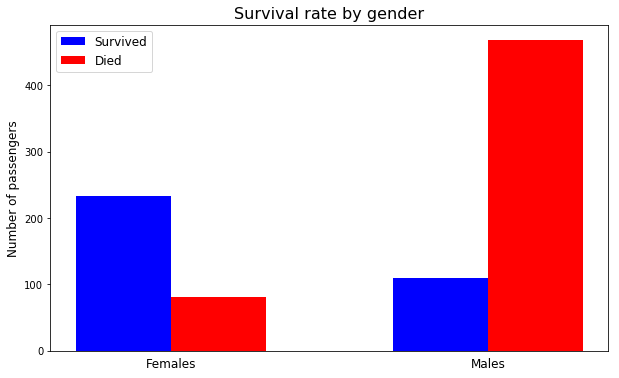

In [149]:
females_survived, females_died = 0, 0
males_survived, males_died = 0, 0
for key, value in passengers.iteritems():
    if(value["sex"] == "female" and value["survived"] == "1"):
        females_survived += 1
    if(value["sex"] == "female" and value["survived"] == "0"):
        females_died += 1
    if(value["sex"] == "male" and value["survived"] == "1"):
        males_survived += 1
    if(value["sex"] == "male" and value["survived"] == "0"):
        males_died += 1
        
N = 2
survived = (females_survived, males_survived)
died = (females_died, males_died)

ind = np.arange(N)
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(ind, survived, width, color='b')
ax.bar(ind + width, died, width, color='r')

ax.set_ylabel('Number of passengers', fontsize=12)
ax.set_title('Survival rate by gender', fontsize=16)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Females', 'Males'), fontsize=12)
ax.xaxis.set_ticks_position('none')

ax.legend(('Survived', 'Died'), fontsize=12)

plt.show()

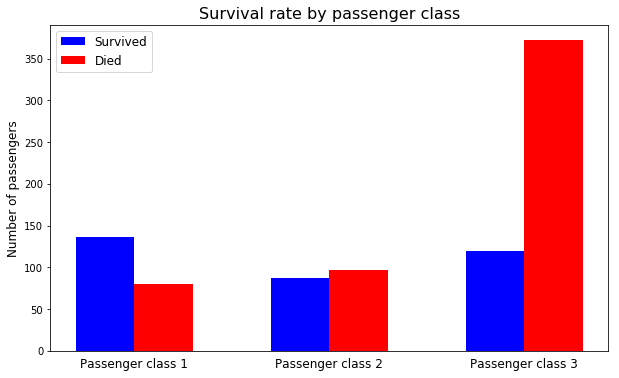

In [150]:
class01_survived, class01_died = 0, 0
class02_survived, class02_died = 0, 0
class03_survived, class03_died = 0, 0
for key, value in passengers.iteritems():
    if(value["p_class"] == "1" and value["survived"] == "1"):
        class01_survived += 1
    if(value["p_class"] == "1" and value["survived"] == "0"):
        class01_died += 1
    if(value["p_class"] == "2" and value["survived"] == "1"):
        class02_survived += 1
    if(value["p_class"] == "2" and value["survived"] == "0"):
        class02_died += 1
    if(value["p_class"] == "3" and value["survived"] == "1"):
        class03_survived += 1
    if(value["p_class"] == "3" and value["survived"] == "0"):
        class03_died += 1

survived = (class01_survived, class02_survived, class03_survived)
died = (class01_died, class02_died, class03_died)

ind = np.arange(3)
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(ind, survived, width, color='b')
ax.bar(ind + width, died, width, color='r')

ax.set_ylabel('Number of passengers', fontsize=12)
ax.set_title('Survival rate by passenger class', fontsize=16)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Passenger class 1', 'Passenger class 2', 'Passenger class 3'), fontsize=12)
ax.xaxis.set_ticks_position('none')
ax.legend(('Survived', 'Died'), fontsize=12)
plt.show()

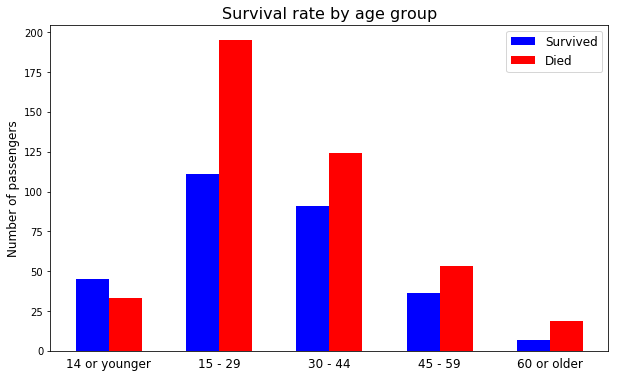

In [151]:
age_group01_survived, age_group01_died = 0, 0
age_group02_survived, age_group02_died = 0, 0
age_group03_survived, age_group03_died = 0, 0
age_group04_survived, age_group04_died = 0, 0
age_group05_survived, age_group05_died = 0, 0
for key, value in passengers.iteritems():
    if(value["age"] != ""):
        if(float(value["age"]) < 15 and value["survived"] == "1"):
            age_group01_survived += 1
        if(float(value["age"]) < 15 and value["survived"] == "0"):
            age_group01_died += 1
        if(15 <= float(value["age"]) < 30 and value["survived"] == "1"):
            age_group02_survived += 1
        if(15 <= float(value["age"]) < 30 and value["survived"] == "0"):
            age_group02_died += 1
        if(30 <= float(value["age"]) < 45 and value["survived"] == "1"):
            age_group03_survived += 1
        if(30 <= float(value["age"]) < 45 and value["survived"] == "0"):
            age_group03_died += 1
        if(45 <= float(value["age"]) < 60 and value["survived"] == "1"):
            age_group04_survived += 1
        if(45 <= float(value["age"]) < 60 and value["survived"] == "0"):
            age_group04_died += 1
        if(float(value["age"]) >= 60 and value["survived"] == "1"):
            age_group05_survived += 1
        if(float(value["age"]) >= 60 and value["survived"] == "0"):
            age_group05_died += 1

survived = (age_group01_survived, age_group02_survived, age_group03_survived, age_group04_survived,
            age_group05_survived)
died = (age_group01_died, age_group02_died, age_group03_died, age_group04_died, age_group05_died)

ind = np.arange(5)
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(ind, survived, width, color='b')
ax.bar(ind + width, died, width, color='r')

ax.set_ylabel('Number of passengers', fontsize=12)
ax.set_title('Survival rate by age group', fontsize=16)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('14 or younger', '15 - 29', '30 - 44', '45 - 59', '60 or older'), fontsize=12)
ax.xaxis.set_ticks_position('none')
ax.legend(('Survived', 'Died'), fontsize=12)
plt.show()

It is clear based on these bar charts that females were more likely to survive, the highest passenger class and the youngest demographic.

Lets replace the missing values for the attribute *age* with the mean age for different combinations of passenger classes and gender.

In [152]:
passengers_ages = defaultdict(list)
for key, value in passengers.iteritems():
    if(value["age"] != ""):
        # Females in Class 1 
        if(value["p_class"] == "1" and value["sex"] == "female"):
            passengers_ages["class01_females"].append(float(value["age"]))
        # Males in Class 1 
        if(value["p_class"] == "1" and value["sex"] == "male"):
            passengers_ages["class01_males"].append(float(value["age"]))
        # Females in Class 2
        if(value["p_class"] == "2" and value["sex"] == "female"):
            passengers_ages["class02_females"].append(float(value["age"]))
        # Males in Class 2
        if(value["p_class"] == "2" and value["sex"] == "male"):
            passengers_ages["class02_males"].append(float(value["age"]))
        # Females in Class 3
        if(value["p_class"] == "3" and value["sex"] == "female"):
            passengers_ages["class03_females"].append(float(value["age"]))
        # Males in Class 3
        if(value["p_class"] == "3" and value["sex"] == "male"):
            passengers_ages["class03_males"].append(float(value["age"]))

In [153]:
class01_females_mean = np.mean(passengers_ages["class01_females"])
print "Number of females in passenger class 1: %d" % len(passengers_ages["class01_females"])
print "Mean age of females in passenger class 1: %f\n" % class01_females_mean

class01_males_mean = np.mean(passengers_ages["class01_males"])
print "Number of males in passenger class 1: %d" % len(passengers_ages["class01_males"])
print "Mean age of males in passenger class 1: %f\n" % class01_males_mean

class02_females_mean = np.mean(passengers_ages["class02_females"])
print "Number of females in passenger class 2: %d" % len(passengers_ages["class02_females"])
print "Mean age of females in passenger class 2: %f\n" % class02_females_mean

class02_males_mean = np.mean(passengers_ages["class02_males"])
print "Number of males in passenger class 2: %d" % len(passengers_ages["class02_males"])
print "Mean age of males in passenger class 2: %f\n" % class02_males_mean

class03_females_mean = np.mean(passengers_ages["class03_females"])
print "Number of females in passenger class 3: %d" % len(passengers_ages["class03_females"])
print "Mean age of females in passenger class 3: %f\n" % class03_females_mean

class03_males_mean = np.mean(passengers_ages["class03_males"])
print "Number of males in passenger class 3: %d" % len(passengers_ages["class03_males"])
print "Mean age of males in passenger class 3: %f" % class03_males_mean

Number of females in passenger class 1: 133
Mean age of females in passenger class 1: 37.037594

Number of males in passenger class 1: 151
Mean age of males in passenger class 1: 41.029272

Number of females in passenger class 2: 103
Mean age of females in passenger class 2: 27.499223

Number of males in passenger class 2: 158
Mean age of males in passenger class 2: 30.815380

Number of females in passenger class 3: 152
Mean age of females in passenger class 3: 22.185329

Number of males in passenger class 3: 349
Mean age of males in passenger class 3: 25.962264


For *fare*, the missing value will be replaced with the mean and for *embarked* the two missing values will be replaced with the mode.

In [154]:
passengers_fare_mean = np.mean(passengers_fare)
print "Mean of fare: %f" % passengers_fare_mean

passengers_embarked_mode = Counter(passengers_embarked).most_common(1)[0][0]
print "Mode of embarked: %s" % passengers_embarked_mode

Mean of fare: 33.295479
Mode of embarked: S


Now lets extract the titles from the names.

In [155]:
passengers_title = []
for name in passengers_name:
    title = name.split(", ")[1].split(".")[0]
    passengers_title.append(title)

In [156]:
passengers_title_classes = sorted(set(passengers_title))
print "title:", passengers_title_classes

title: ['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']


Lets prepare data for the model and add it into an array. Classes which have strings as values will get integer values instead.

In [157]:
X = []
y = []
for key, value in passengers.iteritems():
    # Extract the title from the name attribute
    title = value["name"].split(", ")[1].split(".")[0]
    # Integer value for the title attribute
    title_int = passengers_title_classes.index(title)
        
    # Integer value for the sex attribute
    sex_int = passengers_sex_classes.index(value["sex"])
        
    # Missing age values will get the mean age from different combinations
    # of passenger classes and gender
    if(value["age"] == ""):
        
        # Females in Class 1 
        if(value["p_class"] == "1" and value["sex"] == "female"):
            age = class01_females_mean
        # Males in Class 1 
        elif(value["p_class"] == "1" and value["sex"] == "male"):
            age = class01_males_mean
        # Females in Class 2
        elif(value["p_class"] == "2" and value["sex"] == "female"):
            age = class02_females_mean
        # Males in Class 2
        elif(value["p_class"] == "2" and value["sex"] == "male"):
            age = class02_males_mean
        # Females in Class 3
        elif(value["p_class"] == "3" and value["sex"] == "female"):
            age = class03_females_mean
        # Males in Class 3
        else:
            age = class03_males_mean
    
    else:
        age = float(value["age"])
        
    # Extract information from attributes 'sip_sp' and 'parch' to determine if
    # the passenger is on his own, part of a small family or part of a large family
    size_of_family = 1 + int(value["sip_sp"]) + int(value["parch"])
    if(size_of_family >= 5):
        family_size = 0
    elif(2 <= size_of_family < 5):
        family_size = 1
    else:
        family_size = 2
        
    # Missing fare values will get the mean fare
    if(value["fare"] == ""):
        fare = passengers_fare_mean
    else:
        fare = float(value["fare"])
            
    # Missing embarked values will get the mode of embarked
    if(value["embarked"] == ""):
        embarked = passengers_embarked_mode
    else:
        embarked = value["embarked"]
    # Integer value for the embarked attribute
    embarked_int = passengers_embarked_classes.index(embarked)        
                
    X.append([int(value["p_class"]), title_int, sex_int, age, int(value["sip_sp"]), int(value["parch"]),
              family_size, fare, embarked_int, value["data"], key])

    if(value["data"] == "training_data"):
        y.append(int(value["survived"]))
    else:
        y.append(value["survived"])
    
X = np.array(X)
print "Number of samples: %d" % len(X)

Number of samples: 1309


Next step is to remove the test data from the array.

In [158]:
# Remove the test data and the last two columns from X which contains the
# attribute whether or not the data tuple was a training_data or test_data
# and passenger ID
X_training_data = X[np.all(X != "test_data", axis=1)][:, :-2]

# # Remove the test data
y_training_data = np.array([label for label in y if label != "N/A"])

print "Number of training data tuples (X): %d" % len(X_training_data)
print "Number of class labels (y): %d" % len(y_training_data)

Number of training data tuples (X): 891
Number of class labels (y): 891


When the model is fitted it is possible to see which features are the most important according to auto parameters for the random forest classifier.

In [159]:
features = ["p_class", "title", "sex", "age", "sip_sp", "parch", "family_size", "fare", "embarked"]

rf_classifier = RandomForestClassifier()
rf_classifier = rf_classifier.fit(X_training_data, y_training_data)
for idx, score in enumerate(rf_classifier.feature_importances_):
    print "%s: %f" % (features[idx], score)

p_class: 0.083002
title: 0.102578
sex: 0.208577
age: 0.213454
sip_sp: 0.041412
parch: 0.019836
family_size: 0.042775
fare: 0.260466
embarked: 0.027901


Here it is clear that there are three key features; *fare*, *age* and *sex*. Furthermore, since there are such few features the random forest model will use all of them later on.

Max depth of the trees within the model are crucial in order to optimize the model.

In [160]:
random_forest_max_depths = sorted([estimator.tree_.max_depth for estimator in rf_classifier.estimators_])
print random_forest_max_depths

max_depth_upper_limit = max(random_forest_max_depths)

[14, 15, 17, 17, 17, 17, 17, 17, 17, 19]


Max depth from this list will be the upper limit for *max_depth* parameter when the model is pruned for optimization.

Other parameters that will be pruned: *n_estimators* and *max_features*

In [161]:
param_grid = {"n_estimators": [10, 50, 100],
              "max_features": ["auto", "sqrt", "log2"],
              "max_depth" : range(2, max_depth_upper_limit)
             }

K = 5
CV = cross_validation.KFold(len(X_training_data), K, shuffle=True)

grid_search = GridSearchCV(rf_classifier,
                           scoring="accuracy",
                           param_grid=param_grid,
                           cv=CV)

grid_search = grid_search.fit(X_training_data, y_training_data)

In [162]:
print "Top score: %f\n" % grid_search.best_score_
print "Using these parameters:"
for param, value in grid_search.best_params_.iteritems():
    print "%s: %s" % (param, value)

Top score: 0.840629

Using these parameters:
max_features: log2
n_estimators: 100
max_depth: 7


Next step is to extract the test data from the array.

In [163]:
# Remove the test data and the last two columns from X which contains the
# attribute whether or not the data tuple was a training_data or test_data
# and passenger ID
X_test_data = X[np.all(X != "training_data", axis=1)][:, :-2]

print "Number of test data tuples (X): %d" % len(X_test_data)

Number of test data tuples (X): 418


Finally, the data is fitted into the random forest model and trained with the optimized parameters found earlier.

In [164]:
# Fit random forest to the training data and predict the test data
rf_classifier = RandomForestClassifier(max_features="log2", n_estimators=100, max_depth=7)
rf_classifier = rf_classifier.fit(X_training_data, y_training_data)
y_predictions = rf_classifier.predict(X_test_data)

In [165]:
# Extract passenger ID column
X_test_data_passenger_id = X[np.all(X != "training_data", axis=1)][:, -1:]

# Combine passenger ID and predictions into a list
survival_predictions = []
for idx, passenger_id in enumerate(X_test_data_passenger_id):
    survival_predictions.append([int(passenger_id[0]), y_predictions[idx]])

In [166]:
# Write to a csv-file
with open("survival_predictions.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerow(("PassengerId", "Survived"))
    writer.writerows(sorted(survival_predictions))